
# Datos ultra reales del SDSS

1. Entrar a la página de SDSS

http://cas.sdss.org/dr7/en/tools/search/sql.asp

2. Descargar este catálogo de galaxias con la siguiente información:

Redshift (z), Ascención recta (ra), Declinación (dec)


Galaxias (specClass=2) con redshift entre 0 y 0.10, declinación entre -3º y 3º, y asención recta entre 0 y 360º

~~~~ 
SELECT STR(z,10,6) z, ra, dec

FROM specObj

WHERE specClass=2 AND dec BETWEEN -3 AND 3 AND ra BETWEEN 0 AND 360

AND z BETWEEN 0 AND 0.10
~~~~ 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
datos = genfromtxt('result.csv', delimiter=',', skip_header=1)

In [3]:
datos

array([[ 9.9337000e-02,  2.2292087e+02,  4.0384120e-02],
       [ 6.3820000e-03,  2.2160654e+01, -6.7524790e-01],
       [ 8.9090000e-03,  4.2219416e+01, -3.5106701e-01],
       ...,
       [ 7.1474000e-02,  1.5535846e+02, -1.0116024e+00],
       [ 7.1476000e-02,  1.6047563e+02,  1.1811139e+00],
       [ 7.1476000e-02,  2.2666009e+02, -1.3408348e+00]])

In [4]:
datos.shape

(36575, 3)

In [5]:
def z_to_Mly( z):
    """Esta función convierte el corrimiento al rojo (z) a distancia en millones de años luz (Mly)"""
    Mly = 3.26 * (   3000 * z 
                  - 607.8 * z**2 
                  - 156.3 * z**3 
                  + 138.3 * z ** 4) / 0.71   
    return Mly

def coord_to_x(Mly,ra):
    return Mly * cos( ra * pi / 180)

def coord_to_y(Mly,ra):
    return Mly * sin( ra * pi / 180)

In [6]:
CoordenadaX = []
CoordenadaY = []

for i in range( datos.shape[0] ):
    z   = datos[i,0]
    ra  = datos[i,1]
    
    x = coord_to_x(z,ra)
    y = coord_to_y(z,ra)
    
    CoordenadaX.append(x)
    CoordenadaY.append(y)

In [7]:
size(CoordenadaX)

36575

In [8]:
size(CoordenadaY)

36575

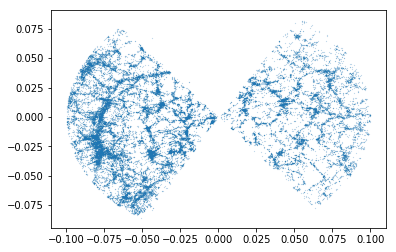

In [12]:
scatter(CoordenadaX, CoordenadaY, s=0.01)

(-0.11041441395902114,
 0.1104143227513137,
 -0.09453032606437842,
 0.09085083662108613)

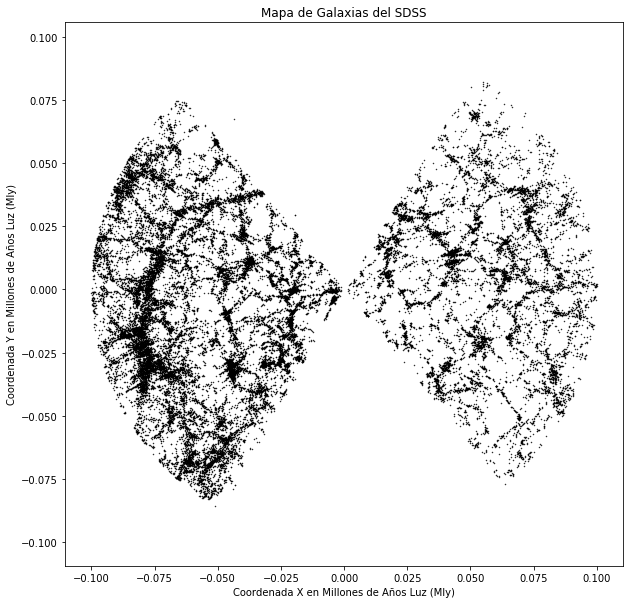

In [13]:
fig = figure(figsize=(10,10))
title("Mapa de Galaxias del SDSS")
scatter(CoordenadaX, CoordenadaY, s=0.2, c="k")
xlabel("Coordenada X en Millones de Años Luz (Mly)")
ylabel("Coordenada Y en Millones de Años Luz (Mly)")

plt.axis('equal')